In [1]:
%%time
from CPT.CPT import *
layout = CPT()
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[576697, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])
layout.add_measurements(measurements = points, points_type = 'initial')
layout.optimize_measurements()
layout.plot_optimization()
layout.generate_combined_layer(points_type = 'initial')
layout.plot_layer(layout.combined_layer)


Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Adding initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!


<Figure size 600x600 with 1 Axes>

Generating combined layer for initial measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


<Figure size 600x600 with 2 Axes>

CPU times: user 1.41 s, sys: 303 ms, total: 1.71 s
Wall time: 2 s


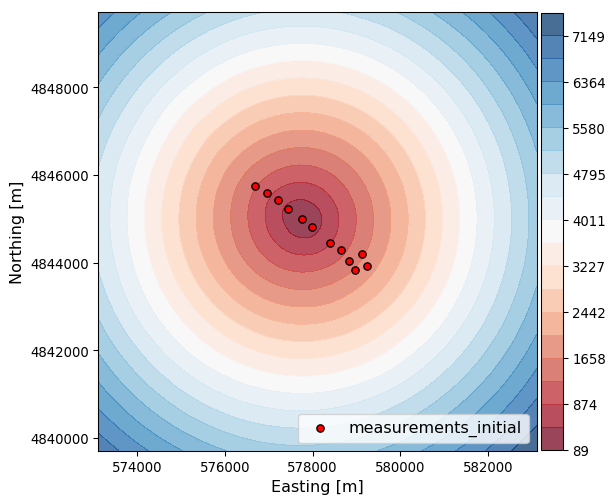

In [2]:
layout.plot_layer(layout.range_array[:,:,4])

Lidar 1 position added!


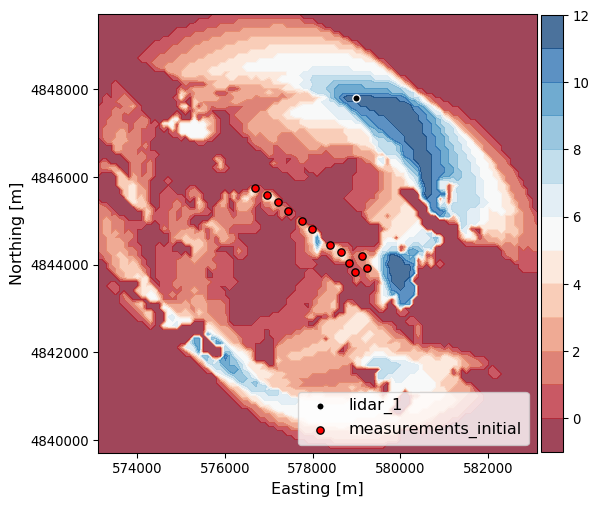

CPU times: user 257 ms, sys: 7.24 ms, total: 264 ms
Wall time: 262 ms


In [3]:
%%time
layout.add_lidars(lidar_pos_1 = np.array([580800 - 1800,4845300 + 2500, 271]))
layout.plot_layer(layout.combined_layer)

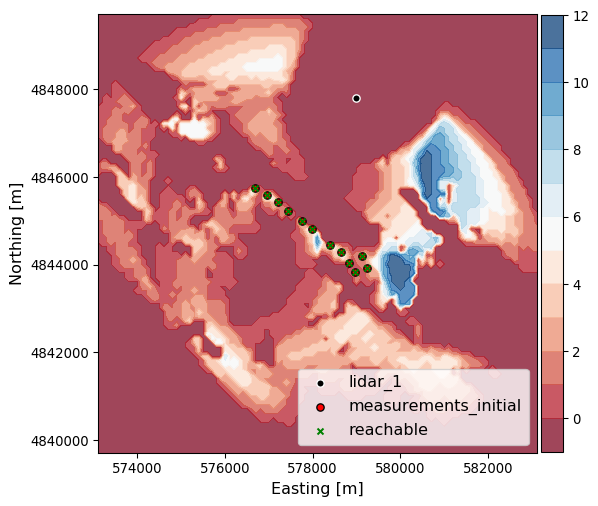

CPU times: user 322 ms, sys: 11.3 ms, total: 333 ms
Wall time: 333 ms


In [4]:
%%time
layout.generate_second_lidar_layer()
layout.plot_layer(layout.second_lidar_layer)

Lidar 2 position added!


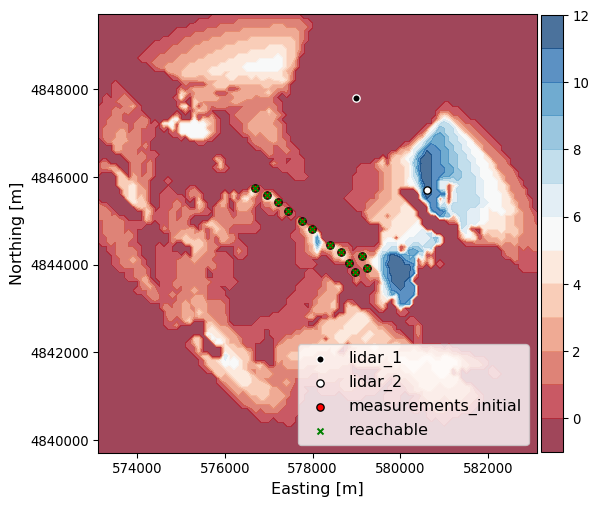

CPU times: user 373 ms, sys: 14.7 ms, total: 388 ms
Wall time: 393 ms


In [5]:
%%time

layout.add_lidars(lidar_pos_2 = np.array([579400 + 1200,4847700 - 2000,100]))
layout.plot_layer(layout.second_lidar_layer)

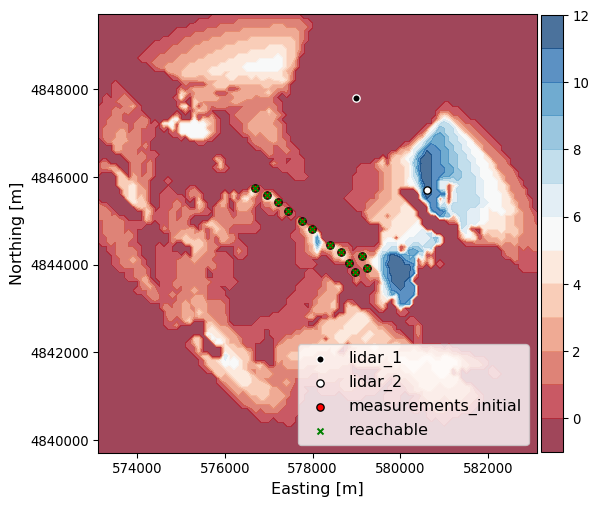

CPU times: user 376 ms, sys: 12.7 ms, total: 389 ms
Wall time: 396 ms


In [6]:
%%time

layout.generate_campaign_layout()
layout.plot_layer(layout.second_lidar_layer)

In [7]:
steering_angles_1, steering_angles_2 = layout.optimize_trajectory()

[576697, 4845753, 475]
[576968, 4845595, 519]
[ 579000 4847800     271]
[ 228.3680049     3.78786433 3087.98218907]
[ 222.6618676     4.72804693 3008.74608433]
[576697, 4845753, 475]
[576968, 4845595, 519]
[ 580600 4845700     100]
[ 270.77798865    5.48762588 3921.33178907]
[ 268.34405791    6.57802293 3657.59620516]
[576697, 4845753, 475]
[576968, 4845595, 519]
[ 579000 4847800     271]
[ 228.3680049     3.78786433 3087.98218907]
[ 222.6618676     4.72804693 3008.74608433]
[576697, 4845753, 475]
[576968, 4845595, 519]
[ 580600 4845700     100]
[ 270.77798865    5.48762588 3921.33178907]
[ 268.34405791    6.57802293 3657.59620516]
[576697, 4845753, 475]
[577215, 4845425, 503]
[ 579000 4847800     271]
[ 228.3680049     3.78786433 3087.98218907]
[ 216.92775267    4.46506029 2980.0459728 ]
[576697, 4845753, 475]
[577215, 4845425, 503]
[ 580600 4845700     100]
[ 270.77798865    5.48762588 3921.33178907]
[ 265.35544705    6.76728422 3419.9793859 ]
[576697, 4845753, 475]
[577215, 4845425,

[ 226.60412999    9.59670992 2459.32917683]
[577752, 4845005, 526]
[578974, 4843842, 497]
[ 579000 4847800     271]
[ 204.0613173     4.76214118 3071.57191028]
[1.80376369e+02 3.26794405e+00 3.96453225e+03]
[577752, 4845005, 526]
[578974, 4843842, 497]
[ 580600 4845700     100]
[ 256.28609226    8.26802952 2962.36476485]
[ 221.19029122    9.1345618  2500.72969351]
[577752, 4845005, 526]
[578974, 4843842, 497]
[ 579000 4847800     271]
[ 204.0613173     4.76214118 3071.57191028]
[1.80376369e+02 3.26794405e+00 3.96453225e+03]
[577752, 4845005, 526]
[578974, 4843842, 497]
[ 580600 4845700     100]
[ 256.28609226    8.26802952 2962.36476485]
[ 221.19029122    9.1345618  2500.72969351]
[577752, 4845005, 526]
[579121, 4844186, 493]
[ 579000 4847800     271]
[ 204.0613173     4.76214118 3071.57191028]
[1.78082402e+02 3.51317213e+00 3.62283328e+03]
[577752, 4845005, 526]
[579121, 4844186, 493]
[ 580600 4845700     100]
[ 256.28609226    8.26802952 2962.36476485]
[ 224.33001641   10.51902772 21

In [10]:
layout.lidar_pos_1

array([ 579000, 4847800,     271])

In [9]:
steering_angles_2[:,0]

array([270.77798865, 268.34405791, 265.35544705, 261.34784333,
       256.28609226, 251.42089467, 240.37586536, 233.9603487 ,
       226.60412999, 224.33001641, 221.19029122, 217.18189622])

In [11]:
layout.generate_beam_coords(layout.lidar_pos_1, [576697, 4845753, 475], 1)[0]

array([ 228.3680049 ,    3.78786433, 3087.98218907])

In [14]:
layout.generate_beam_coords(layout.lidar_pos_1, np.array([576697, 4845753, 475]), 0)

array([[ 228.3680049 ,    3.78786433, 3087.98218907]])